# Predicting House Prices


As per the project requirement we are going to follow the following steps:

1. Use Case
2. Data Set
3. Data Quality Assessment
4. Data Exploration (e.g. correlation between columns)
5. Data Visualization (e.g. value distribution of columns)
6. At least one Feature Engineering (e.g. imputing missing values) applied
7. Selection and justification of Model Performance Indicator (e.g. F1 score)
8. At least one traditional Machine Learning Algorithm and one DeepLearning Algorithm applied and demonstrated
9. Model performance between different feature engineerings and models compared and documented

# Step 1: UseCase

A housing price prediction model can help  the establishment of real estate policies. 

1. Can we predict the house prices?

2. What are the important deciding factors in predicting house prices?

__Goal__: The goal of this project is to Predict sales prices of residential homes in Ames.

# Step 2: DataSet 

1. The data source is from an  external data source __kaggle__ .


2. The data is in the form of CSV   files.

3. It consists of 79 feature  variables.

4. The dataset is a part of challenge: __House Prices: Advanced Regression Techniques__.

5. The goal is to predict the final price of each home.





We start with Importing necessary all the necessary  libraries

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor



from scipy.special import boxcox1p,boxcox, inv_boxcox
from scipy.stats import norm, skew, probplot


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold


from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression



print(tf.__version__)

Using TensorFlow backend.


2.1.0


# Step 3a: Data Quality Assessment : Training Set

We will evaluate data in order to determine whether it is :
    
1. of the right type and 
2. quality  and quanitity of data is sufficient for the required  projects 

In [3]:
train_df  = pd.read_csv(r'D:\IBM\Advanced_DS_Capstone\kaggle_input\house-prices-advanced-regression-techniques\train.csv')
train=train_df.copy()

train_df=train_df.drop('Id', 1) # Drop the ID

print(train_df.shape) # we are left with 79 features and 1 target


(1460, 80)


In [4]:
train_df.head() # To view at the first five rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.describe(include='all') # Describing all columns of a DataFrame regardless of data type.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


__Findings__: We can see from the count entries that some features have missing entries. 

Lets explore the missing entries  further:

### 1. Missing entries

In [6]:
def missing_entries_plot(df):   
    miss_ent = df.isnull().sum()/len(df)*100
    
    miss_ent = miss_ent[miss_ent>0]
    miss_ent.sort_values(inplace=True)
    miss_ent_df = miss_ent.to_frame()
    
    
    miss_ent_df.columns = ['Count']
    miss_ent_df.index.names = ['Name']
    miss_ent_df['Name'] = miss_ent.index
    print(miss_ent_df)
    print('Total number of  features with  null entries: ', len(miss_ent_df))
    #plot the missing value count
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = 'Count', data=miss_ent_df)
    plt.xticks(rotation = 90)
    plt.show()

                  Count          Name
Name                                 
Electrical     0.068493    Electrical
MasVnrType     0.547945    MasVnrType
MasVnrArea     0.547945    MasVnrArea
BsmtQual       2.534247      BsmtQual
BsmtCond       2.534247      BsmtCond
BsmtFinType1   2.534247  BsmtFinType1
BsmtExposure   2.602740  BsmtExposure
BsmtFinType2   2.602740  BsmtFinType2
GarageCond     5.547945    GarageCond
GarageQual     5.547945    GarageQual
GarageFinish   5.547945  GarageFinish
GarageType     5.547945    GarageType
GarageYrBlt    5.547945   GarageYrBlt
LotFrontage   17.739726   LotFrontage
FireplaceQu   47.260274   FireplaceQu
Fence         80.753425         Fence
Alley         93.767123         Alley
MiscFeature   96.301370   MiscFeature
PoolQC        99.520548        PoolQC
Total number of  features with  null entries:  19


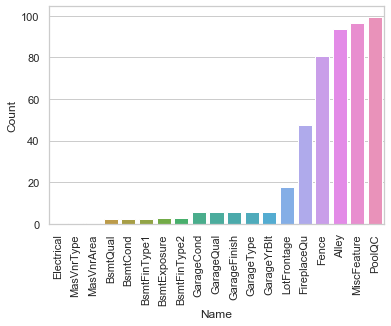

In [7]:
train_missing_plot =missing_entries_plot(train_df)

### Findings : There are total 19 entries with null entries and 4 entries where 50 % of the data is missing.


Now analyzing the categorical(Qualitative) and numeric(Quantative)  features separately.

### 2. Categorical and numeric data

In [8]:
def feature_type(df):
    numeric_type=[]
    categorical_type=[]
    for ent in df.columns:
        if( df[ent].dtype == np.float64 or df[ent].dtype == np.int64):
                numeric_type.append(ent)
        elif ( df[ent].dtype == np.object):
                categorical_type.append(ent)
    return numeric_type, categorical_type

In [9]:
training_numeric_features, training_categorical_features =feature_type(train_df)
print('The number of numeric features in training dataset are: ',len(training_numeric_features))
print('The number of categorical features in training dataset are: ',len(training_categorical_features))

The number of numeric features in training dataset are:  37
The number of categorical features in training dataset are:  43


In [10]:
print('Training Numeric features are: ', training_numeric_features)


Training Numeric features are:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Findings:
##### As can be seen 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold','GarageYrBlt','YearBuilt','YearRemodAdd' are assigned to numeric data. They can be moved to categorical values. We will take care of this in Feature Engineering Step.

Now lets see what is there in categorical features.

In [11]:
print('Training Categorical features are: ', training_categorical_features)

Training Categorical features are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### 3. Skewness check: Skewness defines the lack of symmetry in data. 

Linear Regression is based on the  assumption of Multivariate normality which  means that regression requires all its variables to be normal.

By having skewed data we violate the assumption of normality which effects the performnace of our model.


#### 3a. Lets pertform  Normailty test on numeric feature variables first.

In [12]:
train_numeric_df= train_df[training_numeric_features]

In [13]:
skewness = train_numeric_df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})

skewness_df.head(10)

,Skewness
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


__Findings__: It is clear that our features are also not normally distributed. We will take care of skewness in Feture Engineering Step.

#### 3b. To check the skewness of the target varaible

The skewness of the target variable: SalePrice is  1.8828757597682129


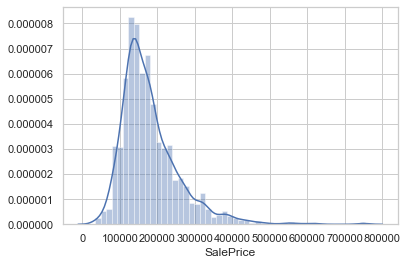

In [14]:
#SalePrice
sns.distplot(train['SalePrice'])
print('The skewness of the target variable: SalePrice is ', train['SalePrice'].skew())

__Findings__ It is clear from the results that our traget variable is postively skewed. 

__Solution__ We can  try log transform to see if we can 
reduce this skewness.

#### Before  Log Transform


1. The plot shows  how the data differs from the normal curve. 

2. Further we show the  probability plot that  showing  how the SalePrice diverges from the normal distribution.

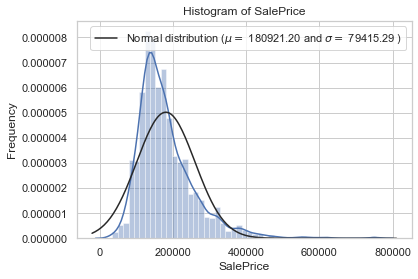

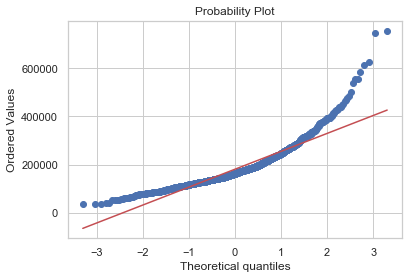

In [15]:
mu, sigma = norm.fit(train_df['SalePrice'])
sns.distplot(train_df['SalePrice'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(train_df['SalePrice'], plot=plt);

#### After  Log Transform

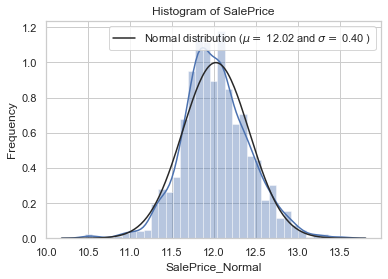

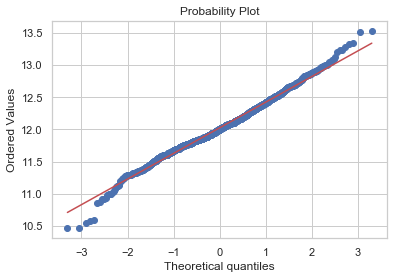

In [16]:
train_df['SalePrice_Normal'] = np.log1p(train_df['SalePrice'])

mu, sigma = norm.fit(train_df['SalePrice_Normal'])
sns.distplot(train_df['SalePrice_Normal'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(train_df['SalePrice_Normal'], plot=plt);

#### Findings : We have managed to make the SalePrice normalized.

### 4. Now moving towards categorical features

Lets start by exploring Neighborhood , how it is related to SalePrice

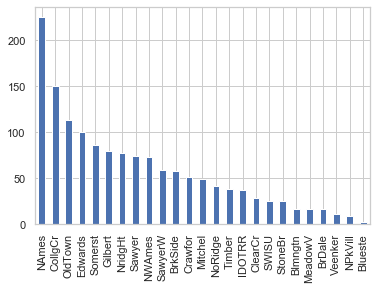

In [17]:
train_df['Neighborhood'].value_counts().plot(kind='bar')


We can see there are 25 Unique Neiborhoods.

To find the relationship between Neighorhood and SalePrice, we will do the following: 

1. We will groupby Neighborhood 
2. Find the mean sale Price correspondingly
3. Assign increasing order values to Neighborhood Names

In [18]:
cat_df = pd.DataFrame()
cat_df['NameNeighborhood'] = train_df['Neighborhood'].unique()
cat_df.index = cat_df.NameNeighborhood
cat_df['SalePriceMean'] = train_df[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean()['SalePrice']
cat_df = cat_df.sort_values('SalePriceMean', ascending=True)

cat_df['NameNeighborhoodOrder'] = range(1, cat_df.shape[0]+1)

cat_df.head()

,NameNeighborhood,SalePriceMean,NameNeighborhoodOrder
NameNeighborhood,,,
MeadowV,MeadowV,98576.470588,1
IDOTRR,IDOTRR,100123.783784,2
BrDale,BrDale,104493.750000,3
BrkSide,BrkSide,124834.051724,4
Edwards,Edwards,128219.700000,5


The relationship between Neighborhood and Sales price can be seen below:

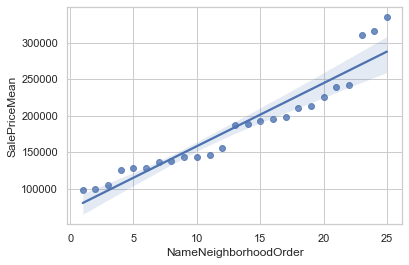

In [19]:
sns.regplot(x='NameNeighborhoodOrder', y='SalePriceMean', data=cat_df);

#### Findings: It can be clearly seen that Neighborhood plays a vital role in determining SalePrice. 
##### Higher the order of Neighborhood higher the SalePrice

Now,   to find the relationship between categorical features with Sale Price, we will apply ordeing encoding to all the categorical features.

In [20]:
def encode_order(df, cat_feature):
    cat_df = pd.DataFrame()
    cat_df['Name'] = df[cat_feature].unique()
    cat_df.index = cat_df.Name
    cat_df['SalePricemean'] = df[[cat_feature, 'SalePrice']].groupby(cat_feature).mean()['SalePrice']
    cat_df = cat_df.sort_values('SalePricemean')
    cat_df['Order'] = range(1, cat_df.shape[0]+1)
    cat_df = cat_df['Order'].to_dict()
    
    for cat, order in cat_df.items():
        df.loc[df[cat_feature] == cat, cat_feature+'_EO'] = order
    


In [21]:
training_categorical_encoded=[]
for ent in training_categorical_features:  
    encode_order(train_df, ent)
    training_categorical_encoded.append(ent+'_EO')
#print(training_categorical_encoded)

Now lets move towards Testing Set

# Step 3b: Data Quality Assessment : Testing Set

In [22]:
test_df  = pd.read_csv(r'D:\IBM\Advanced_DS_Capstone\kaggle_input\house-prices-advanced-regression-techniques\test.csv')
test=test_df.copy()

test_df=test_df.drop('Id', 1) # Drop the ID
#train_df=train_df.drop('SalePrice', 1) # Drop the target which is Sales Price


print(test_df.shape) # we are have 79 features and no target column

(1459, 79)


In [23]:
test_df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
test_df.describe(include='all') # Describing all columns of a DataFrame regardless of data type.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [25]:
test_numeric_featres, test_categorical_featres =feature_type(test_df)
print('The number of numeric features in testing dataset are: ',len(test_numeric_featres))
print('The number of categorical features in testing dataset are: ',len(test_categorical_featres))

The number of numeric features in testing dataset are:  36
The number of categorical features in testing dataset are:  43


# Step 4. Data Exploration 

### 1. Correlation between columns

To find the correlation between numeric and categorical features

#### 1a. Numeric features

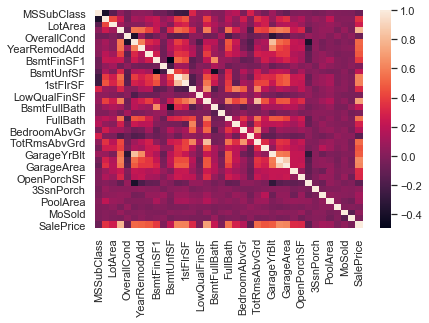

In [26]:
numeric_corr=train_numeric_df.corr()

sns.heatmap(numeric_corr)

#### Top 10 numeric values which are strongly correlated with SalePrice

In [27]:
print (numeric_corr.SalePrice.sort_values(ascending=False)[:10], '\n') #top 10 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



#### Findings: 

1. OverallQual:  Overall material and finish quality and 

2. GrLivArea: Above grade (ground) living area square feet 

are the most important features which is as expected. We will visualize their relationship in Data Visualization step.

#### 1b.  Categorical  features

Here we can use our ordered categorical features. 

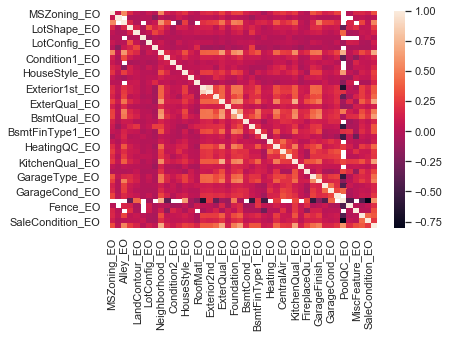

In [28]:
categorical_corr = train_df[training_categorical_encoded+['SalePrice']].corr()
sns.heatmap(categorical_corr)

#### Top 10 categorical values which are strongly correlated with SalePrice

In [29]:
print (categorical_corr.SalePrice.sort_values(ascending=False)[:10], '\n') #top 10 values

SalePrice          1.000000
Neighborhood_EO    0.696882
ExterQual_EO       0.682639
KitchenQual_EO     0.659600
BsmtQual_EO        0.644019
PoolQC_EO          0.595229
Alley_EO           0.534319
GarageFinish_EO    0.513105
Foundation_EO      0.505503
GarageType_EO      0.445598
Name: SalePrice, dtype: float64 



#### Findings: 

1. Neighborhood_EO: Physical locations within Ames city limits  and  

2. ExterQual_EO: Exterior material quality
    
are the important features.  We will visualize their relationship in Data Visualization step.

# Step 5. Data Visualization

We will visualize two top most features from Numeric and Categorical Data

### 1. Top most Numeric feature: Overall Quality

[ 7  6  8  5  9  4 10  3  1  2]


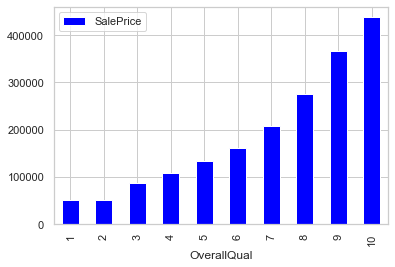

In [30]:
print(train_df['OverallQual'].unique())


pivot = train_df.pivot_table(index='OverallQual', values='SalePrice')
pivot.plot(kind='bar', color='blue')

__Findings__ As the Overall Quality increases sale price increases, which is as expected.

### 2. Top most Categorical feature: Neighborhood Quality

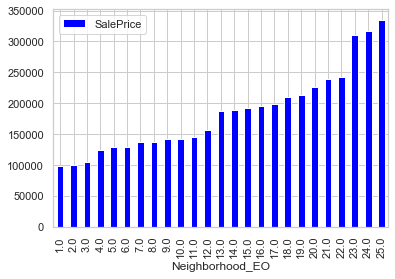

In [31]:
pivot = train_df.pivot_table(index='Neighborhood_EO', values='SalePrice')
pivot.plot(kind='bar', color='blue')

__Finding__: Higher the rating/order of Neighborhood, higher is then Sale Price.

### 3. Second top most Numeric  feature: GrLivArea: Above grade (ground) living area square feet

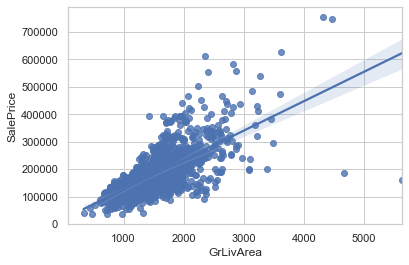

In [32]:
ax = sns.regplot(x='GrLivArea', y='SalePrice', data=train_df)

#### Findings:

1. As the Living Area increases sale price increases, which is also expected.

2. Futher there are outliers after 4000.  We will get rid of these in feature engineering.

### 4. Second top most categorical  feature: ExterQual  : Exterior material quality

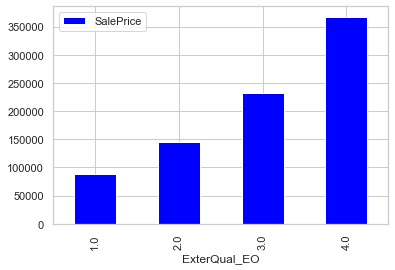

In [33]:
pivot = train_df.pivot_table(index='ExterQual_EO', values='SalePrice')
pivot.plot(kind='bar', color='blue')

__Finding__: Higher the rating/order of Exterior Quality, higher is then Sale Price.

# Step 6. Feature Engineering 


Here we are going to do the following steps:

1. Removing the outliers

2. Removing redundant features

3. Adding new  features

4. Correcting  data type of feature

5. Imputing missing values

6. Removing skewness from feature variables

7. Creating dummy variables (ONE-HOT ENCODING)


### 1. Removing the outliers

Since GrLivArea is one the most important feature in determining Sale Price, we will remove the four entries which are outliers in GrLivArea as seen in Data Visulaization section.


In [34]:
train_df = train_df[train_df.GrLivArea < 4000]
train_df.reset_index(drop=True, inplace=True)


__Note__ We are setting y (target) parameter as the log transformation os SalePrice which is normalized. This we have already chekeced in Skewness section in Step 3 while assessing the Quality of Data.

In [35]:
y = train_df['SalePrice_Normal']
len(y)

1456

Now to obtain only features , we are going to drop SalePrice columns from training data.

In [36]:
train_df_features = train_df.drop(['SalePrice','SalePrice_Normal'], axis=1)

Now we will concatenate training and test features , so all the rest of the feature engineering processes can be applied
on both the datasets

In [37]:
features_df = pd.concat([train_df_features, test_df]).reset_index(drop=True)

### 2. Removing redundant features

#### a. Basement finished square feet

 Total square feet of basement area ('TotalBsmtSF')  is sum of:
    
1. BsmtFinSF1: Type 1 finished square feet

2. BsmtFinSF2: Type 2 finished square feet

3. BsmtUnfSF: Unfinished square feet of basement area

Therefore, we will keep the total column and drop the individual columns

In [38]:
features_df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1, inplace=True) 

#### b. Living Area

Since GrLivArea: Above grade (ground) living area square feet is sum of :
        
1.   1stFlrSF: First Floor square feet
    
2.   2ndFlrSF: Second floor square feet   
    
We will drop these two redundant columns

In [39]:
features_df.drop(['1stFlrSF', '2ndFlrSF'], axis = 1,inplace=True) 

#### c. Bathrooms


We will combine all the bathrooms to compute total bathrooms.

__Note__ For the Half Bathrooms we are going to assign 0.5 weight, whilecomputing total.

1. BsmtFullBath: Basement full bathrooms

2. BsmtHalfBath: Basement half bathrooms

3. FullBath: Full bathrooms above grade

4. HalfBath: Half baths above grade

In [40]:
features_df['TotalBathRooms']=features_df['BsmtFullBath']+ features_df['FullBath']+ 0.5*features_df['BsmtHalfBath']+ 0.5*features_df['HalfBath']

features_df.drop(['BsmtFullBath', 'FullBath',  'BsmtHalfBath', 'HalfBath' ], axis = 1,inplace=True) 


#### d. Porch

We will combine all the Porch areas to have a single column TotalPorchArea and will drop the individual entries.

1. OpenPorchSF: Open porch area in square feet

2. EnclosedPorch: Enclosed porch area in square feet

3. 3SsnPorch: Three season porch area in square feet

4. ScreenPorch: Screen porch area in square feet

In [41]:
features_df['TotalPorchArea']=features_df['OpenPorchSF']+features_df['EnclosedPorch']+features_df['3SsnPorch']+features_df['ScreenPorch']

features_df.drop(['OpenPorchSF','EnclosedPorch', '3SsnPorch',  'ScreenPorch' ], axis = 1,inplace=True) 


### 3. Adding new  features

Depending upon if the house has a column for a particular facility, we are going to convert these values to a binary value.

In [42]:
features_df['houseWithPool'] = features_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features_df['houseWithGarage'] = features_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features_df['houseWithBasement'] = features_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features_df['houseWithFireplace'] = features_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### 4. Correcting  data type of feature

We will correct the datatypes of certain features as we are not going to perform any mathematical operations on them.

In [43]:
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold','GarageYrBlt','YearBuilt','YearRemodAdd']:
    features_df.loc[:, col] = features_df[col].astype(str)

### 5.  Imputing missing values
To deal with  the coloumns with missing values:


1. For the categorical features, we will impute with the "top" value, i.e., mode.


2. For numeric features:

     a. we will impute with the "mean" values if the respective feature is negatively skewed.
     
     b. we will impute with the "median" values if the respective feature is postively skewed.

In [44]:
def imputing_missing_entries(df):
    for ent in df.columns:
        if (df[ent].isnull().any()==True):
            if( df[ent].dtype == np.float64 or df[ent].dtype == np.int64):
                #print("We are going to replace ", ent + " by mean:",   df[ent].mean())
                df[ent].fillna(min(df[ent].mean(),df[ent].median()), inplace=True)
            elif (df[ent].dtype == np.object):
                #print("We are going to replace ", ent + " by mode:",   df[ent].mode())
                df[ent].fillna(df[ent].mode(), inplace=True)
                #df[ent].replace(to_replace=[None], value=df[ent].mode(), inplace=True) # for 
    return df

In [45]:
features_df=imputing_missing_entries(features_df)

In [ ]:
# To check if all entries are imputed, uncommet the code below
#for ent in features_df.columns:
    #if (features_df[ent].isnull().any()==False):
        #print('All entries are imputed')


### 6. Removing skewness from numeric feature variables

To remove skewness from numeric features  we will apply Box-Cox transformation.

In [46]:
numeric_features, categorical_features =feature_type(features_df)


In [47]:
skewness_features = features_df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_features_df = pd.DataFrame({'Skewness_Features': skewness_features})
skewness_features_df.head()

,Skewness_Features
MiscVal,21.932147
MiscFeature_EO,19.054225
PoolArea,18.701829
houseWithPool,16.186531
RoofMatl_EO,13.452955


In [48]:
boxcox_features = skewness_features_df[np.abs(skewness_features_df['Skewness_Features'])>0.75].index
lam = 0.15

for col in boxcox_features:
    features_df.loc[:, col] = boxcox1p(features_df[col], lam)

### 7. Creating dummy variables (ONE-HOT ENCODING)

The machine learning models do not take strings but only accept numbers, therefore, we will  create dummy variables for our categorical features. 

We use pandas' "get_dummies" method.

In [49]:
final_features_df = pd.get_dummies(features_df).reset_index(drop=True)
final_features_df.shape

(2915, 641)

In [50]:
X = final_features_df.iloc[:len(y), :]
X_test_sub = final_features_df.iloc[len(y):, :]
X.shape, y.shape, X_test_sub.shape

((1456, 641), (1456,), (1459, 641))

# Step 7. Model Performance Indicator 

We will evaluate the performance of the model using two metrics  Root Mean Squared Error (RMSE) and R-squared value.


1. Root Mean Squared Error (MSE) :It is the square root of the average of squared differences between prediction and true vaue. 

__Since it has the same units as the SalePrice. Therefore we choose to use RMSE__


2. R-squared values range from 0 to 1 and are commonly stated as percentages.
R2 ranges from 0 to 1:

1. if R2=0 : the model always fails to predict the target variable,
2. if R2=1 : the model perfectly predicts the target variable.

__Any value between 0 and 1 indicates what percentage of the target variable, using the model, can be explained by the features__. 




## Definig RMSE and R^2 for Keras which we will use as evaluation metric

In [51]:
def keras_rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [52]:
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Step 8a Machine Learning Algorithm

## 1. SVR :

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression

In [53]:
# Model initialization
regression_model = SVR()
# Fit the data(train the model)
regression_model.fit(X, y)
# PredictX
y_pred = regression_model.predict(X)

# model evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2=r2_score(y, y_pred)



print("SVR: has RMSE: {:.4f}  and R2_score: {:.4f}\n".format(rmse, r2) )
         

SVR: has RMSE: 0.2430  and R2_score: 0.6235



## 2. LASSO (least absolute shrinkage and selection operator)

In [54]:



# Model initialization
regression_model = Lasso(alpha=0.00099, max_iter=1000)
# Fit the data(train the model)
regression_model.fit(X, y)
# PredictX
y_pred = regression_model.predict(X)

# model evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2=r2_score(y, y_pred)


print("LASSO: has RMSE: {:.4f}  and R2_score: {:.4f}\n".format(rmse, r2) )



LASSO: has RMSE: 0.1036  and R2_score: 0.9316



## 3. Linear Regression

In [59]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X, y)
# PredictX
y_pred = regression_model.predict(X)

# model evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2=r2_score(y, y_pred)



print("Linear Regression: has RMSE: {:.4f}  and R2_score: {:.4f}\n".format(rmse, r2) )

lr_pred = regression_model.predict(X_test_sub) 
lr_pred = np.expm1(lr_pred)
lr_pred_df = pd.DataFrame(lr_pred, index=test["Id"], columns=["SalePrice"]) 
lr_pred_df.to_csv('lr_seq.csv', header=True, index_label='Id') 

Linear Regression: has RMSE: 0.0766  and R2_score: 0.9626



# Step 8b DeepLearning Algorithm

### 1. Build the model

In [60]:
def build_model():
    model = keras.Sequential([
       layers.Dense(64, activation='relu', input_shape=[final_features_df.shape[1]]),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)
     ])

    #optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=[keras_rmse,r_square])
    return model

In [61]:
model = build_model()

### 2. Inspect the model
Use the .summary method to print a simple description of the model

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                41088     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 45,313
Trainable params: 45,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#example_batch = X[:10]
#example_result = model.predict(example_batch)
#np.expm1(example_result)

In [63]:
np.random.seed(55) # for reproducibility
EPOCHS = 1000

history = model.fit(
  X, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, keras_rmse:3.8878,  loss:48.2954,  r_square:-377.1167,  val_keras_rmse:10.5677,  val_loss:144.4709,  val_r_square:-1142.7252,  
....................................................................................................
Epoch: 100, keras_rmse:0.4299,  loss:0.2881,  r_square:-1.0385,  val_keras_rmse:0.4419,  val_loss:0.2548,  val_r_square:-0.8980,  
....................................................................................................
Epoch: 200, keras_rmse:0.2843,  loss:0.1210,  r_square:0.2078,  val_keras_rmse:0.1256,  val_loss:0.0282,  val_r_square:0.8006,  
....................................................................................................
Epoch: 300, keras_rmse:0.2516,  loss:0.0860,  r_square:0.3747,  val_keras_rmse:0.3041,  val_loss:0.1228,  val_r_square:0.1210,  
....................................................................................................
Epoch: 400, keras_rmse:0.2034,  loss:0.0696,  r_square:0.5682,  val_

In [65]:
keras_pred = model.predict(X_test_sub) 
keras_pred = np.expm1(keras_pred)
pred_df = pd.DataFrame(keras_pred, index=test["Id"], columns=["SalePrice"]) 
pred_df.to_csv('keras_seq.csv', header=True, index_label='Id') 

### Visualize the model's training progress using the stats stored in the history object.

In [66]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,keras_rmse,r_square,val_loss,val_keras_rmse,val_r_square,epoch
995,0.037209,0.142842,0.745347,0.056087,0.205584,0.565152,995
996,0.042470,0.171571,0.708055,0.028807,0.126647,0.809660,996
997,0.037761,0.167405,0.741348,0.061249,0.216940,0.514857,997
998,0.041794,0.166675,0.720006,0.027188,0.127186,0.802236,998
999,0.041941,0.181710,0.705117,0.040555,0.162021,0.724488,999


In [67]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'RMSE [SalePrice]')

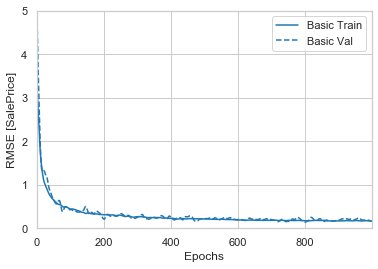

In [70]:
plotter.plot({'Basic': history}, metric = "keras_rmse")
plt.ylim([0,5])
plt.ylabel('RMSE [SalePrice]')

__Findings__: Both the training and validation loss decrease  as the number of epochs is increased, suggesting that the model gains a high degree of accuracy
    as our epochs (or number of forward and backward passes) is increased

# Conclusion: 

We have tried to predict the housing prices using regression techniques. The most of the time we have spent in
Feature Engineering. The results are promising good if we remove the skewness of the data. 